In [ ]:
import os
import shutil
import kagglehub
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2, EfficientNetB0, VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras import mixed_precision
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.initializers import GlorotNormal
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow import keras
from tensorflow.keras.optimizers import Adam

from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.applications.resnet import ResNet101
from tensorflow.keras.applications import ResNet50
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.applications import EfficientNetV2L

import random
import warnings
warnings.filterwarnings('ignore')

In [ ]:
path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'new-plant-diseases-dataset' dataset.
Path to dataset files: /kaggle/input/new-plant-diseases-dataset


In [ ]:
SMALL_DATASET_PATH = "/kaggle/working/small_dataset"
os.makedirs(SMALL_DATASET_PATH, exist_ok = True)

In [ ]:
# Pick 4 classes only
selected_classes = ['Tomato___Late_blight', 'Tomato___healthy', 'Potato___Early_blight', 'Potato___healthy']

In [ ]:
!ls "/kaggle/input/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train"

 Apple___Apple_scab
 Apple___Black_rot
 Apple___Cedar_apple_rust
 Apple___healthy
 Blueberry___healthy
'Cherry_(including_sour)___healthy'
'Cherry_(including_sour)___Powdery_mildew'
'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
'Corn_(maize)___Common_rust_'
'Corn_(maize)___healthy'
'Corn_(maize)___Northern_Leaf_Blight'
 Grape___Black_rot
'Grape___Esca_(Black_Measles)'
 Grape___healthy
'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'
'Orange___Haunglongbing_(Citrus_greening)'
 Peach___Bacterial_spot
 Peach___healthy
 Pepper,_bell___Bacterial_spot
 Pepper,_bell___healthy
 Potato___Early_blight
 Potato___healthy
 Potato___Late_blight
 Raspberry___healthy
 Soybean___healthy
 Squash___Powdery_mildew
 Strawberry___healthy
 Strawberry___Leaf_scorch
 Tomato___Bacterial_spot
 Tomato___Early_blight
 Tomato___healthy
 Tomato___Late_blight
 Tomato___Leaf_Mold
 Tomato___Septoria_leaf_spot
'Tomato___Spider_mites Two-spotted_spider_mite'
 Tomato___Target_Spot
 Tomato___Tomato_mosaic_virus
 Tomato_

In [ ]:
original_path = "/kaggle/input/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train"

In [ ]:
for cls in selected_classes:
    src = os.path.join(original_path, cls)
    dst = os.path.join(SMALL_DATASET_PATH, cls)
    shutil.copytree(src, dst)

In [ ]:
DATASET_PATH = SMALL_DATASET_PATH

In [ ]:
# Parameters
IMG_HEIGHT = 160
IMG_WIDTH = 160
BATCH_SIZE = 16
EPOCHS = 10

In [ ]:
# Load dataset with 4 classes
train_ds = tf.keras.utils.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

Found 7540 files belonging to 4 classes.
Using 6032 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

Found 7540 files belonging to 4 classes.
Using 1508 files for validation.


In [ ]:
class_names = train_ds.class_names
num_classes = len(class_names)
print("Number of classes:", num_classes)

Number of classes: 4


In [ ]:
# Normalize pixel values
normalization_layer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y)).cache().shuffle(500).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y)).cache().prefetch(tf.data.AUTOTUNE)

In [ ]:
# I am trying to compile again with smaller LR
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
fine_tune_epochs = 5
total_epochs = EPOCHS + fine_tune_epochs

In [ ]:
history_fine = model.fit(train_ds,
                         validation_data=val_ds,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1])

Epoch 10/15
377/377 ━━━━━━━━━━━━━━━━━━━━ 51s 48ms/step - accuracy: 0.2462 - loss: 1.4275 - val_accuracy: 0.2467 - val_loss: 1.4105
Epoch 11/15
377/377 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.2384 - loss: 1.4176 - val_accuracy: 0.2354 - val_loss: 1.3910
Epoch 12/15
377/377 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.2521 - loss: 1.4100 - val_accuracy: 0.2467 - val_loss: 1.3880
Epoch 13/15
377/377 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.2606 - loss: 1.4063 - val_accuracy: 0.2467 - val_loss: 1.3955
Epoch 14/15
377/377 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.2481 - loss: 1.4108 - val_accuracy: 0.2467 - val_loss: 1.4169
Epoch 15/15
377/377 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.2517 - loss: 1.4105 - val_accuracy: 0.2553 - val_loss: 1.3871


In [ ]:
acc = history.history['accuracy'] + history_fine.history['accuracy']
val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy']
loss = history.history['loss'] + history_fine.history['loss']
val_loss = history.history['val_loss'] + history_fine.history['val_loss']
epochs_range = range(total_epochs)

# Trying with VGG-19 Pre-trained model

In [ ]:
base_model = VGG19(include_top=False, weights='imagenet', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
base_model.trainable = False

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
inputs = Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3))
x = normalization_layer(inputs)
x = base_model(x, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)
outputs = Dense(num_classes, activation='softmax')(x)
model = Model(inputs, outputs)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, validation_data=val_ds, epochs=EPOCHS)

Epoch 1/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 50s 100ms/step - accuracy: 0.2482 - loss: 1.4977 - val_accuracy: 0.2354 - val_loss: 1.3900
Epoch 2/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 35s 94ms/step - accuracy: 0.2506 - loss: 1.4038 - val_accuracy: 0.2553 - val_loss: 1.3874
Epoch 3/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 40s 92ms/step - accuracy: 0.2466 - loss: 1.4024 - val_accuracy: 0.2354 - val_loss: 1.4016
Epoch 4/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 35s 92ms/step - accuracy: 0.2496 - loss: 1.4002 - val_accuracy: 0.2354 - val_loss: 1.4025
Epoch 5/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 41s 93ms/step - accuracy: 0.2546 - loss: 1.3956 - val_accuracy: 0.2467 - val_loss: 1.3942
Epoch 6/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 35s 92ms/step - accuracy: 0.2482 - loss: 1.3993 - val_accuracy: 0.2553 - val_loss: 1.3863
Epoch 7/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 35s 92ms/step - accuracy: 0.2554 - loss: 1.3967 - val_accuracy: 0.2354 - val_loss: 1.3998
Epoch 8/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 35s 93ms/step - accuracy: 0.2656 - loss: 1.3931 -

In [ ]:
base_model.trainable = True
fine_tune_at = len(base_model.layers) - 20

In [ ]:
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
fine_tune_epochs = 5
total_epochs = EPOCHS + fine_tune_epochs

In [ ]:
history_fine = model.fit(train_ds,
                         validation_data=val_ds,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1])

Epoch 10/15
377/377 ━━━━━━━━━━━━━━━━━━━━ 103s 219ms/step - accuracy: 0.2641 - loss: 1.3912 - val_accuracy: 0.2354 - val_loss: 1.3876
Epoch 11/15
377/377 ━━━━━━━━━━━━━━━━━━━━ 81s 216ms/step - accuracy: 0.2516 - loss: 1.3872 - val_accuracy: 0.2354 - val_loss: 1.3885
Epoch 12/15
377/377 ━━━━━━━━━━━━━━━━━━━━ 81s 215ms/step - accuracy: 0.2610 - loss: 1.3877 - val_accuracy: 0.2354 - val_loss: 1.3888
Epoch 13/15
377/377 ━━━━━━━━━━━━━━━━━━━━ 81s 215ms/step - accuracy: 0.2432 - loss: 1.3886 - val_accuracy: 0.2354 - val_loss: 1.3876
Epoch 14/15
377/377 ━━━━━━━━━━━━━━━━━━━━ 81s 214ms/step - accuracy: 0.2362 - loss: 1.3883 - val_accuracy: 0.2354 - val_loss: 1.3890
Epoch 15/15
377/377 ━━━━━━━━━━━━━━━━━━━━ 82s 213ms/step - accuracy: 0.2590 - loss: 1.3868 - val_accuracy: 0.2354 - val_loss: 1.3876


In [ ]:
acc = history.history['accuracy'] + history_fine.history['accuracy']
val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy']
loss = history.history['loss'] + history_fine.history['loss']
val_loss = history.history['val_loss'] + history_fine.history['val_loss']
epochs_range = range(len(acc))

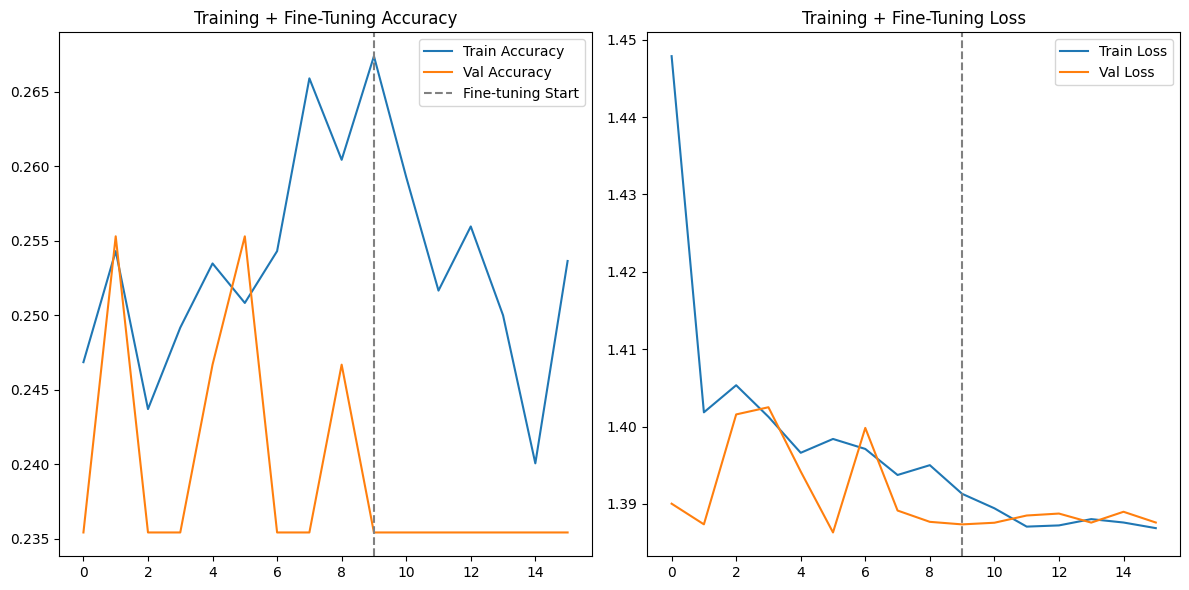

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.axvline(x=EPOCHS-1, color='gray', linestyle='--', label='Fine-tuning Start')
plt.legend()
plt.title("Training + Fine-Tuning Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.axvline(x=EPOCHS-1, color='gray', linestyle='--')
plt.legend()
plt.title("Training + Fine-Tuning Loss")
plt.tight_layout()
plt.show()

# Run from HERE

In [ ]:
image_shape = (224,224)
batch_size = 64

train_dir="/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
valid_dir="/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"

train_datagen = ImageDataGenerator(rescale=1/255., validation_split=0.2)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [ ]:
print("Training Images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=image_shape,
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=True,
                                               subset='training')

print("Validating Images:")
valid_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=image_shape,
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=False,
                                               subset='validation')

print('Test Images:')
test_data = test_datagen.flow_from_directory(valid_dir,
                                               target_size=image_shape,
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=False)

Training Images:
Found 56251 images belonging to 38 classes.
Validating Images:
Found 14044 images belonging to 38 classes.
Test Images:
Found 17572 images belonging to 38 classes.


In [ ]:
images, labels = next(iter(train_data))
diseases = os.listdir(train_dir)

In [ ]:
plants = []
NumberOfDiseases = 0
for plant in diseases:
    if plant.split('___')[0] not in plants:
        plants.append(plant.split('___')[0])

In [ ]:
dic = {}
for Class in diseases:
    dic[Class] = len(os.listdir(train_dir + '/' + Class))

df = pd.DataFrame(list(dic.items()), columns=["Disease Class", "Number of Images"])

In [ ]:
def plot_learning_curves(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

In [ ]:
def predict_labels_and_display(model_path, test_dir='/kaggle/input/new-plant-diseases-dataset/test/test', image_size=(224, 224)):

    best_model = load_model(model_path)

    true_labels = []
    predicted_labels = []
    images = []

    for filename in os.listdir(test_dir):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):

            img_path = os.path.join(test_dir, filename)
            img = load_img(img_path, target_size=image_size)
            img_array = img_to_array(img) / 255.0
            img_array = np.expand_dims(img_array, axis=0)

            prediction = best_model.predict(img_array, verbose=0)
            predicted_class = np.argmax(prediction, axis=1)[0]

            true_label = filename.split('.')[0]

            class_labels = list(train_data.class_indices.keys())
            predicted_label = class_labels[predicted_class]

            true_labels.append(true_label)
            predicted_labels.append(predicted_label)
            images.append(img)

    selected_indices = random.sample(range(len(images)), 3)

    plt.figure(figsize=(15, 5))
    for i, idx in enumerate(selected_indices):
        plt.subplot(1, 3, i + 1)
        plt.imshow(images[idx])
        plt.title(f'True: {true_labels[idx]}\nPredicted: {predicted_labels[idx]}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(224,224,3), kernel_initializer=GlorotNormal()))
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer=GlorotNormal()))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer=GlorotNormal()))
model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer=GlorotNormal()))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu', kernel_initializer=GlorotNormal()))
model.add(Conv2D(128, (3,3), activation='relu', kernel_initializer=GlorotNormal()))
model.add(MaxPooling2D(2,2))

model.add(GlobalAveragePooling2D())

model.add(Dense(256, activation='relu', kernel_initializer=GlorotNormal()))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu', kernel_initializer=GlorotNormal()))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu', kernel_initializer=GlorotNormal()))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(38, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 51, 51, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 49, 49, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 38)             │         2,470 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 365,446 (1.39 MB)

 Trainable params: 364,550 (1.39 MB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
model_checkpoint = ModelCheckpoint('/kaggle/working/cnn_model.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, verbose=1, mode='max', restore_best_weights=True)

history = model.fit(train_data,
                    validation_data=valid_data,
                    epochs=10,
                    batch_size=64,
                    callbacks=[model_checkpoint, early_stopping])

Epoch 1/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 0s 568ms/step - accuracy: 0.1895 - loss: 3.0081
Epoch 1: val_accuracy improved from -inf to 0.42281, saving model to /kaggle/working/cnn_model.keras
879/879 ━━━━━━━━━━━━━━━━━━━━ 654s 711ms/step - accuracy: 0.1897 - loss: 3.0073 - val_accuracy: 0.4228 - val_loss: 1.9537
Epoch 2/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - accuracy: 0.5677 - loss: 1.3943
Epoch 2: val_accuracy improved from 0.42281 to 0.63942, saving model to /kaggle/working/cnn_model.keras
879/879 ━━━━━━━━━━━━━━━━━━━━ 261s 296ms/step - accuracy: 0.5677 - loss: 1.3941 - val_accuracy: 0.6394 - val_loss: 1.0805
Epoch 3/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - accuracy: 0.7088 - loss: 0.9174
Epoch 3: val_accuracy did not improve from 0.63942
879/879 ━━━━━━━━━━━━━━━━━━━━ 262s 297ms/step - accuracy: 0.7089 - loss: 0.9173 - val_accuracy: 0.5050 - val_loss: 1.7311
Epoch 4/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - accuracy: 0.7956 - loss: 0.6369
Epoch 4: val_accuracy improve

In [ ]:
model.save('/kaggle/working/best_CNN_Model.keras')

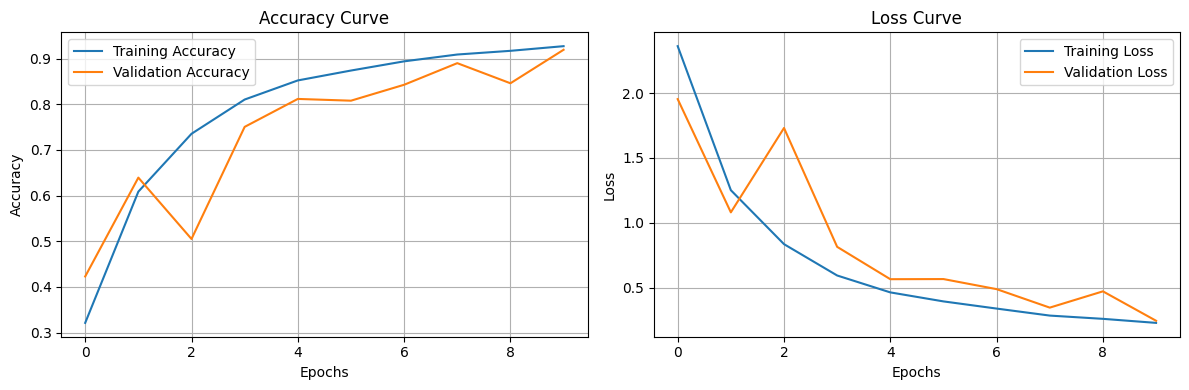

In [ ]:
plot_learning_curves(history)

# VGG-16

In [ ]:
# Determine number of classes
num_classes = len(train_data.class_indices)

In [ ]:
# Load VGG16 pretrained feature extractor
base_vgg = VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Freeze pretrained layers
base_vgg.trainable = False

In [ ]:
# Create classification head
x = base_vgg.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.4)(x)
output = Dense(num_classes, activation="softmax", dtype="float32")(x)

vgg_model = Model(inputs=base_vgg.input, outputs=output)

vgg_model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

vgg_model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,855,782 (56.67 MB)

 Trainable params: 141,094 (551.15 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Callbacks
vgg_ckpt = ModelCheckpoint(
    "vgg16_best.h5",
    monitor="val_accuracy",
    save_best_only=True,
    mode="max",
    verbose=1
)
vgg_early = EarlyStopping(
    monitor="val_accuracy",
    patience=4,
    restore_best_weights=True,
    verbose=1
)
vgg_reduce = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,
    patience=2,
    min_lr=1e-7,
    verbose=1
)

In [ ]:
print("----- Training VGG16 (Feature Extraction) -----")
history_vgg = vgg_model.fit(
    train_data,
    validation_data=valid_data,
    epochs=10,
    callbacks=[vgg_ckpt, vgg_early, vgg_reduce]
)

----- Training VGG16 (Feature Extraction) -----
Epoch 1/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step - accuracy: 0.1262 - loss: 3.4564
Epoch 1: val_accuracy improved from -inf to 0.55497, saving model to vgg16_best.h5


879/879 ━━━━━━━━━━━━━━━━━━━━ 515s 560ms/step - accuracy: 0.1263 - loss: 3.4561 - val_accuracy: 0.5550 - val_loss: 2.5190 - learning_rate: 1.0000e-04
Epoch 2/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.4359 - loss: 2.3671
Epoch 2: val_accuracy improved from 0.55497 to 0.68727, saving model to vgg16_best.h5


879/879 ━━━━━━━━━━━━━━━━━━━━ 318s 362ms/step - accuracy: 0.4359 - loss: 2.3669 - val_accuracy: 0.6873 - val_loss: 1.7354 - learning_rate: 1.0000e-04
Epoch 3/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.5620 - loss: 1.7451
Epoch 3: val_accuracy improved from 0.68727 to 0.73626, saving model to vgg16_best.h5


879/879 ━━━━━━━━━━━━━━━━━━━━ 318s 361ms/step - accuracy: 0.5621 - loss: 1.7450 - val_accuracy: 0.7363 - val_loss: 1.3193 - learning_rate: 1.0000e-04
Epoch 4/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.6330 - loss: 1.3873
Epoch 4: val_accuracy improved from 0.73626 to 0.76381, saving model to vgg16_best.h5


879/879 ━━━━━━━━━━━━━━━━━━━━ 318s 362ms/step - accuracy: 0.6330 - loss: 1.3873 - val_accuracy: 0.7638 - val_loss: 1.0785 - learning_rate: 1.0000e-04
Epoch 5/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - accuracy: 0.6811 - loss: 1.1753
Epoch 5: val_accuracy improved from 0.76381 to 0.78582, saving model to vgg16_best.h5


879/879 ━━━━━━━━━━━━━━━━━━━━ 318s 361ms/step - accuracy: 0.6811 - loss: 1.1753 - val_accuracy: 0.7858 - val_loss: 0.9280 - learning_rate: 1.0000e-04
Epoch 6/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.7134 - loss: 1.0317
Epoch 6: val_accuracy improved from 0.78582 to 0.79970, saving model to vgg16_best.h5


879/879 ━━━━━━━━━━━━━━━━━━━━ 318s 361ms/step - accuracy: 0.7134 - loss: 1.0317 - val_accuracy: 0.7997 - val_loss: 0.8181 - learning_rate: 1.0000e-04
Epoch 7/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.7400 - loss: 0.9267
Epoch 7: val_accuracy improved from 0.79970 to 0.81359, saving model to vgg16_best.h5


879/879 ━━━━━━━━━━━━━━━━━━━━ 318s 362ms/step - accuracy: 0.7400 - loss: 0.9267 - val_accuracy: 0.8136 - val_loss: 0.7401 - learning_rate: 1.0000e-04
Epoch 8/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.7552 - loss: 0.8494
Epoch 8: val_accuracy improved from 0.81359 to 0.82505, saving model to vgg16_best.h5


879/879 ━━━━━━━━━━━━━━━━━━━━ 318s 362ms/step - accuracy: 0.7552 - loss: 0.8494 - val_accuracy: 0.8250 - val_loss: 0.6772 - learning_rate: 1.0000e-04
Epoch 9/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.7715 - loss: 0.7896
Epoch 9: val_accuracy improved from 0.82505 to 0.83623, saving model to vgg16_best.h5


879/879 ━━━━━━━━━━━━━━━━━━━━ 321s 365ms/step - accuracy: 0.7715 - loss: 0.7896 - val_accuracy: 0.8362 - val_loss: 0.6296 - learning_rate: 1.0000e-04
Epoch 10/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - accuracy: 0.7866 - loss: 0.7299
Epoch 10: val_accuracy improved from 0.83623 to 0.84342, saving model to vgg16_best.h5


879/879 ━━━━━━━━━━━━━━━━━━━━ 319s 363ms/step - accuracy: 0.7866 - loss: 0.7299 - val_accuracy: 0.8434 - val_loss: 0.5896 - learning_rate: 1.0000e-04
Restoring model weights from the end of the best epoch: 10.


In [ ]:
print("\n----- VGG16 Evaluation -----")
vgg_eval = vgg_model.evaluate(test_data)
print("Test Loss:", vgg_eval[0])
print("Test Accuracy:", vgg_eval[1])


----- VGG16 Evaluation -----
275/275 ━━━━━━━━━━━━━━━━━━━━ 128s 466ms/step - accuracy: 0.8731 - loss: 0.5103
Test Loss: 0.580898106098175
Test Accuracy: 0.8474277257919312


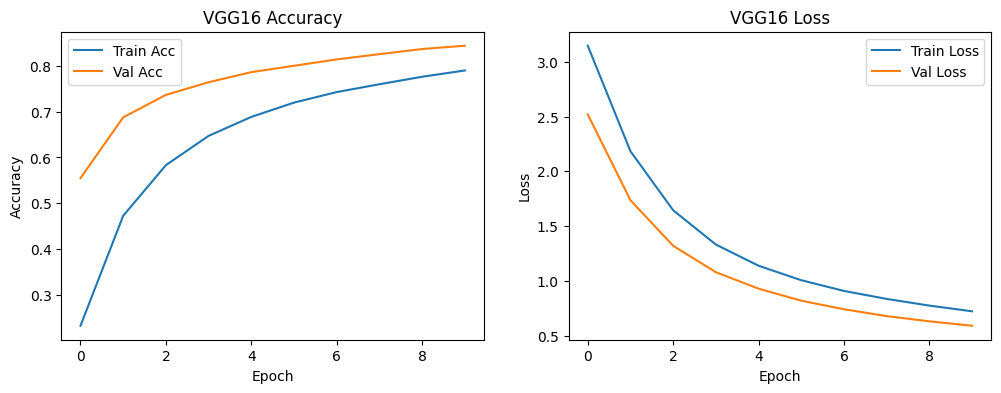

In [ ]:
# === Plots ===
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history_vgg.history["accuracy"], label="Train Acc")
plt.plot(history_vgg.history["val_accuracy"], label="Val Acc")
plt.title("VGG16 Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_vgg.history["loss"], label="Train Loss")
plt.plot(history_vgg.history["val_loss"], label="Val Loss")
plt.title("VGG16 Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

# ResNet50

In [ ]:
base_res = ResNet50(
    weights="imagenet",
    include_top=False,
    input_shape=(224,224,3)
)

base_res.trainable = False  # Feature extraction only

x = base_res.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.4)(x)
output = Dense(num_classes, activation="softmax", dtype="float32")(x)

resnet_model = Model(inputs=base_res.input, outputs=output)

resnet_model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

resnet_model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 24,122,022 (92.02 MB)

 Trainable params: 534,310 (2.04 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
res_ckpt = ModelCheckpoint(
    "resnet50_best.h5",
    monitor="val_accuracy",
    save_best_only=True,
    verbose=1
)
res_early = EarlyStopping(
    monitor="val_accuracy",
    patience=4,
    restore_best_weights=True,
    verbose=1
)
res_reduce = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,
    patience=2,
    min_lr=1e-7,
    verbose=1
)


In [ ]:
print("----- Training ResNet50 -----")
history_res = resnet_model.fit(
    train_data,
    validation_data=valid_data,
    epochs=10,
    callbacks=[res_ckpt, res_early, res_reduce]
)

----- Training ResNet50 -----
Epoch 1/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.0397 - loss: 3.6749
Epoch 1: val_accuracy improved from -inf to 0.09855, saving model to resnet50_best.h5


879/879 ━━━━━━━━━━━━━━━━━━━━ 214s 223ms/step - accuracy: 0.0397 - loss: 3.6748 - val_accuracy: 0.0985 - val_loss: 3.4563 - learning_rate: 1.0000e-04
Epoch 2/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.0871 - loss: 3.4299
Epoch 2: val_accuracy improved from 0.09855 to 0.16313, saving model to resnet50_best.h5


879/879 ━━━━━━━━━━━━━━━━━━━━ 188s 214ms/step - accuracy: 0.0871 - loss: 3.4299 - val_accuracy: 0.1631 - val_loss: 3.2792 - learning_rate: 1.0000e-04
Epoch 3/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.1184 - loss: 3.2775
Epoch 3: val_accuracy improved from 0.16313 to 0.19930, saving model to resnet50_best.h5


879/879 ━━━━━━━━━━━━━━━━━━━━ 182s 207ms/step - accuracy: 0.1184 - loss: 3.2775 - val_accuracy: 0.1993 - val_loss: 3.1497 - learning_rate: 1.0000e-04
Epoch 4/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.1451 - loss: 3.1601
Epoch 4: val_accuracy improved from 0.19930 to 0.24074, saving model to resnet50_best.h5


879/879 ━━━━━━━━━━━━━━━━━━━━ 176s 200ms/step - accuracy: 0.1451 - loss: 3.1601 - val_accuracy: 0.2407 - val_loss: 3.0382 - learning_rate: 1.0000e-04
Epoch 5/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.1778 - loss: 3.0516
Epoch 5: val_accuracy improved from 0.24074 to 0.25292, saving model to resnet50_best.h5


879/879 ━━━━━━━━━━━━━━━━━━━━ 179s 203ms/step - accuracy: 0.1778 - loss: 3.0516 - val_accuracy: 0.2529 - val_loss: 2.9277 - learning_rate: 1.0000e-04
Epoch 6/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.2009 - loss: 2.9507
Epoch 6: val_accuracy improved from 0.25292 to 0.27663, saving model to resnet50_best.h5


879/879 ━━━━━━━━━━━━━━━━━━━━ 179s 203ms/step - accuracy: 0.2009 - loss: 2.9507 - val_accuracy: 0.2766 - val_loss: 2.8256 - learning_rate: 1.0000e-04
Epoch 7/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.2226 - loss: 2.8614
Epoch 7: val_accuracy improved from 0.27663 to 0.28874, saving model to resnet50_best.h5


879/879 ━━━━━━━━━━━━━━━━━━━━ 179s 204ms/step - accuracy: 0.2226 - loss: 2.8613 - val_accuracy: 0.2887 - val_loss: 2.7404 - learning_rate: 1.0000e-04
Epoch 8/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.2443 - loss: 2.7813
Epoch 8: val_accuracy improved from 0.28874 to 0.30191, saving model to resnet50_best.h5


879/879 ━━━━━━━━━━━━━━━━━━━━ 177s 202ms/step - accuracy: 0.2443 - loss: 2.7813 - val_accuracy: 0.3019 - val_loss: 2.6579 - learning_rate: 1.0000e-04
Epoch 9/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.2564 - loss: 2.7122
Epoch 9: val_accuracy improved from 0.30191 to 0.32120, saving model to resnet50_best.h5


879/879 ━━━━━━━━━━━━━━━━━━━━ 178s 203ms/step - accuracy: 0.2564 - loss: 2.7122 - val_accuracy: 0.3212 - val_loss: 2.5903 - learning_rate: 1.0000e-04
Epoch 10/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.2735 - loss: 2.6460
Epoch 10: val_accuracy did not improve from 0.32120
879/879 ━━━━━━━━━━━━━━━━━━━━ 178s 203ms/step - accuracy: 0.2735 - loss: 2.6460 - val_accuracy: 0.3156 - val_loss: 2.5268 - learning_rate: 1.0000e-04
Restoring model weights from the end of the best epoch: 9.


In [ ]:
print("\n----- ResNet50 Evaluation -----")
res_eval = resnet_model.evaluate(test_data)
print("Test Loss:", res_eval[0])
print("Test Accuracy:", res_eval[1])


----- ResNet50 Evaluation -----
275/275 ━━━━━━━━━━━━━━━━━━━━ 50s 182ms/step - accuracy: 0.3126 - loss: 2.6124
Test Loss: 2.583494186401367
Test Accuracy: 0.31948554515838623


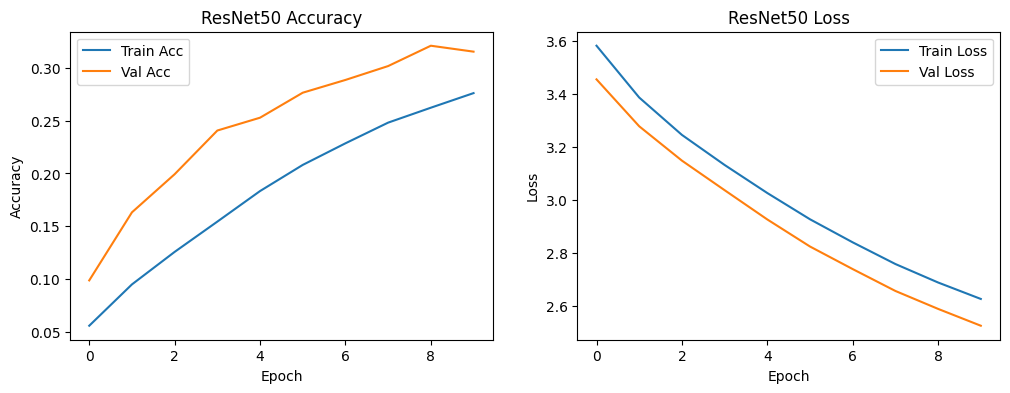

In [ ]:
# === Plots ===
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history_res.history["accuracy"], label="Train Acc")
plt.plot(history_res.history["val_accuracy"], label="Val Acc")
plt.title("ResNet50 Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_res.history["loss"], label="Train Loss")
plt.plot(history_res.history["val_loss"], label="Val Loss")
plt.title("ResNet50 Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

# DenseNet121

In [ ]:
# Load DenseNet121 backbone
base_dense = DenseNet121(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3)
)

base_dense.trainable = False  # Feature extraction only

x = base_dense.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.4)(x)
output = Dense(num_classes, activation="softmax", dtype="float32")(x)

dense_model = Model(inputs=base_dense.input, outputs=output)

dense_model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

dense_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_2    │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d_2… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_3    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_3… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 7,309,670 (27.88 MB)

 Trainable params: 272,166 (1.04 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [ ]:
dense_ckpt = ModelCheckpoint(
    "densenet121_best.h5",
    monitor="val_accuracy",
    save_best_only=True,
    verbose=1
)
dense_early = EarlyStopping(
    monitor="val_accuracy",
    patience=4,
    restore_best_weights=True,
    verbose=1
)
dense_reduce = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,
    patience=2,
    min_lr=1e-7,
    verbose=1
)

In [ ]:
print("----- Training DenseNet121 -----")
history_dense = dense_model.fit(
    train_data,
    validation_data=valid_data,
    epochs=10,
    callbacks=[dense_ckpt, dense_early, dense_reduce]
)

----- Training DenseNet121 -----
Epoch 1/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step - accuracy: 0.3272 - loss: 2.6454
Epoch 1: val_accuracy improved from -inf to 0.84022, saving model to densenet121_best.h5


879/879 ━━━━━━━━━━━━━━━━━━━━ 451s 472ms/step - accuracy: 0.3275 - loss: 2.6445 - val_accuracy: 0.8402 - val_loss: 0.7226 - learning_rate: 1.0000e-04
Epoch 2/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.7803 - loss: 0.7977
Epoch 2: val_accuracy improved from 0.84022 to 0.89440, saving model to densenet121_best.h5


879/879 ━━━━━━━━━━━━━━━━━━━━ 186s 211ms/step - accuracy: 0.7803 - loss: 0.7976 - val_accuracy: 0.8944 - val_loss: 0.4273 - learning_rate: 1.0000e-04
Epoch 3/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.8540 - loss: 0.5111
Epoch 3: val_accuracy improved from 0.89440 to 0.91576, saving model to densenet121_best.h5


879/879 ━━━━━━━━━━━━━━━━━━━━ 185s 210ms/step - accuracy: 0.8540 - loss: 0.5110 - val_accuracy: 0.9158 - val_loss: 0.3189 - learning_rate: 1.0000e-04
Epoch 4/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.8861 - loss: 0.3902
Epoch 4: val_accuracy improved from 0.91576 to 0.92666, saving model to densenet121_best.h5


879/879 ━━━━━━━━━━━━━━━━━━━━ 185s 210ms/step - accuracy: 0.8861 - loss: 0.3901 - val_accuracy: 0.9267 - val_loss: 0.2653 - learning_rate: 1.0000e-04
Epoch 5/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.9048 - loss: 0.3206
Epoch 5: val_accuracy improved from 0.92666 to 0.93727, saving model to densenet121_best.h5


879/879 ━━━━━━━━━━━━━━━━━━━━ 181s 206ms/step - accuracy: 0.9048 - loss: 0.3206 - val_accuracy: 0.9373 - val_loss: 0.2241 - learning_rate: 1.0000e-04
Epoch 6/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.9201 - loss: 0.2722
Epoch 6: val_accuracy improved from 0.93727 to 0.94126, saving model to densenet121_best.h5


879/879 ━━━━━━━━━━━━━━━━━━━━ 183s 208ms/step - accuracy: 0.9201 - loss: 0.2722 - val_accuracy: 0.9413 - val_loss: 0.2055 - learning_rate: 1.0000e-04
Epoch 7/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.9270 - loss: 0.2436
Epoch 7: val_accuracy improved from 0.94126 to 0.94638, saving model to densenet121_best.h5


879/879 ━━━━━━━━━━━━━━━━━━━━ 180s 205ms/step - accuracy: 0.9270 - loss: 0.2436 - val_accuracy: 0.9464 - val_loss: 0.1864 - learning_rate: 1.0000e-04
Epoch 8/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.9352 - loss: 0.2194
Epoch 8: val_accuracy improved from 0.94638 to 0.95194, saving model to densenet121_best.h5


879/879 ━━━━━━━━━━━━━━━━━━━━ 181s 206ms/step - accuracy: 0.9352 - loss: 0.2194 - val_accuracy: 0.9519 - val_loss: 0.1690 - learning_rate: 1.0000e-04
Epoch 9/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.9404 - loss: 0.1988
Epoch 9: val_accuracy improved from 0.95194 to 0.95315, saving model to densenet121_best.h5


879/879 ━━━━━━━━━━━━━━━━━━━━ 185s 210ms/step - accuracy: 0.9404 - loss: 0.1988 - val_accuracy: 0.9531 - val_loss: 0.1564 - learning_rate: 1.0000e-04
Epoch 10/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.9440 - loss: 0.1806
Epoch 10: val_accuracy improved from 0.95315 to 0.95543, saving model to densenet121_best.h5


879/879 ━━━━━━━━━━━━━━━━━━━━ 185s 210ms/step - accuracy: 0.9440 - loss: 0.1806 - val_accuracy: 0.9554 - val_loss: 0.1501 - learning_rate: 1.0000e-04
Restoring model weights from the end of the best epoch: 10.


In [ ]:
print("\n----- DenseNet Evaluation -----")
dense_eval = dense_model.evaluate(test_data)
print("Test Loss:", dense_eval[0])
print("Test Accuracy:", dense_eval[1])


----- DenseNet Evaluation -----
275/275 ━━━━━━━━━━━━━━━━━━━━ 124s 452ms/step - accuracy: 0.9765 - loss: 0.0846
Test Loss: 0.13382315635681152
Test Accuracy: 0.9623264074325562


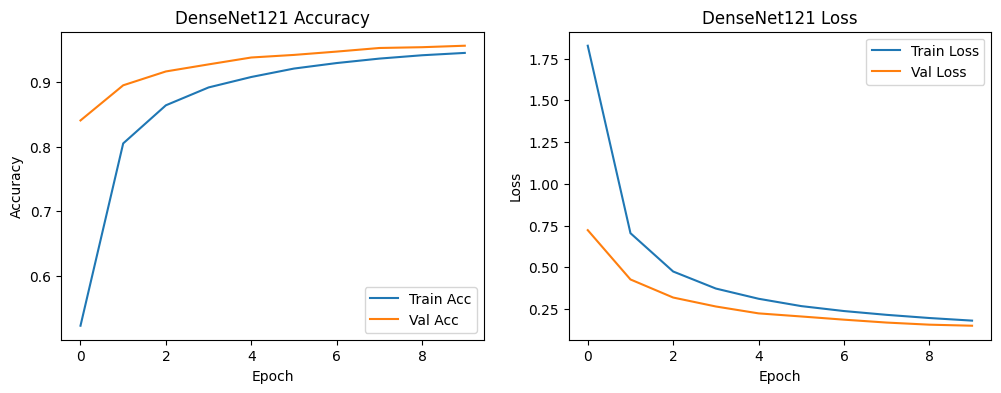

In [ ]:
# === Plots ===
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history_dense.history["accuracy"], label="Train Acc")
plt.plot(history_dense.history["val_accuracy"], label="Val Acc")
plt.title("DenseNet121 Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_dense.history["loss"], label="Train Loss")
plt.plot(history_dense.history["val_loss"], label="Val Loss")
plt.title("DenseNet121 Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

# EfficientNet

In [ ]:
base_eff = EfficientNetB3(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3)
)

base_eff.trainable = False  # Feature extraction only

x = base_eff.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.4)(x)
output = Dense(num_classes, activation="softmax", dtype="float32")(x)

eff_model = Model(inputs=base_eff.input, outputs=output)

eff_model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

eff_model.summary()

43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer_2[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │      1,080 │ stem_conv_pad[0]… │
│                     │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        160 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        360 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        160 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 40)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 40)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 10)  │        410 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 40)  │        440 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 40)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        960 │ block1a_se_excit

 Total params: 11,186,773 (42.67 MB)

 Trainable params: 403,238 (1.54 MB)

 Non-trainable params: 10,783,535 (41.14 MB)

In [ ]:
eff_ckpt = ModelCheckpoint(
    "efficientnetb3_best.h5",
    monitor="val_accuracy",
    save_best_only=True,
    verbose=1
)
eff_early = EarlyStopping(
    monitor="val_accuracy",
    patience=4,
    restore_best_weights=True,
    verbose=1
)
eff_reduce = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,
    patience=2,
    min_lr=1e-7,
    verbose=1
)

In [ ]:
print("----- Training EfficientNetB3 -----")
history_eff = eff_model.fit(
    train_data,
    validation_data=valid_data,
    epochs=10,
    callbacks=[eff_ckpt, eff_early, eff_reduce]
)

----- Training EfficientNetB3 -----
Epoch 1/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.0372 - loss: 3.6236
Epoch 1: val_accuracy improved from -inf to 0.05376, saving model to efficientnetb3_best.h5


879/879 ━━━━━━━━━━━━━━━━━━━━ 283s 270ms/step - accuracy: 0.0372 - loss: 3.6236 - val_accuracy: 0.0538 - val_loss: 3.5240 - learning_rate: 1.0000e-04
Epoch 2/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.0502 - loss: 3.5236
Epoch 2: val_accuracy improved from 0.05376 to 0.06273, saving model to efficientnetb3_best.h5


879/879 ━━━━━━━━━━━━━━━━━━━━ 181s 206ms/step - accuracy: 0.0502 - loss: 3.5236 - val_accuracy: 0.0627 - val_loss: 3.4419 - learning_rate: 1.0000e-04
Epoch 3/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.0532 - loss: 3.4743
Epoch 3: val_accuracy improved from 0.06273 to 0.06309, saving model to efficientnetb3_best.h5


879/879 ━━━━━━━━━━━━━━━━━━━━ 182s 207ms/step - accuracy: 0.0532 - loss: 3.4743 - val_accuracy: 0.0631 - val_loss: 3.4040 - learning_rate: 1.0000e-04
Epoch 4/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.0537 - loss: 3.4571
Epoch 4: val_accuracy did not improve from 0.06309
879/879 ━━━━━━━━━━━━━━━━━━━━ 179s 203ms/step - accuracy: 0.0537 - loss: 3.4571 - val_accuracy: 0.0565 - val_loss: 3.4044 - learning_rate: 1.0000e-04
Epoch 5/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.0556 - loss: 3.4479
Epoch 5: val_accuracy improved from 0.06309 to 0.06359, saving model to efficientnetb3_best.h5


879/879 ━━━━━━━━━━━━━━━━━━━━ 181s 205ms/step - accuracy: 0.0556 - loss: 3.4479 - val_accuracy: 0.0636 - val_loss: 3.3869 - learning_rate: 1.0000e-04
Epoch 6/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.0580 - loss: 3.4377
Epoch 6: val_accuracy did not improve from 0.06359
879/879 ━━━━━━━━━━━━━━━━━━━━ 180s 205ms/step - accuracy: 0.0580 - loss: 3.4377 - val_accuracy: 0.0590 - val_loss: 3.3972 - learning_rate: 1.0000e-04
Epoch 7/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.0567 - loss: 3.4309
Epoch 7: val_accuracy did not improve from 0.06359

Epoch 7: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
879/879 ━━━━━━━━━━━━━━━━━━━━ 181s 206ms/step - accuracy: 0.0567 - loss: 3.4309 - val_accuracy: 0.0605 - val_loss: 3.3909 - learning_rate: 1.0000e-04
Epoch 8/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.0575 - loss: 3.4251
Epoch 8: val_accuracy improved from 0.06359 to 0.06458, saving model to efficientnetb3_best.h5


879/879 ━━━━━━━━━━━━━━━━━━━━ 182s 207ms/step - accuracy: 0.0575 - loss: 3.4251 - val_accuracy: 0.0646 - val_loss: 3.3876 - learning_rate: 5.0000e-05
Epoch 9/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.0578 - loss: 3.4200
Epoch 9: val_accuracy did not improve from 0.06458
879/879 ━━━━━━━━━━━━━━━━━━━━ 181s 206ms/step - accuracy: 0.0578 - loss: 3.4200 - val_accuracy: 0.0634 - val_loss: 3.3794 - learning_rate: 5.0000e-05
Epoch 10/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.0594 - loss: 3.4193
Epoch 10: val_accuracy improved from 0.06458 to 0.06622, saving model to efficientnetb3_best.h5


879/879 ━━━━━━━━━━━━━━━━━━━━ 183s 208ms/step - accuracy: 0.0594 - loss: 3.4193 - val_accuracy: 0.0662 - val_loss: 3.3750 - learning_rate: 5.0000e-05
Restoring model weights from the end of the best epoch: 10.


In [ ]:
print("\n----- EfficientNet Evaluation -----")
eff_eval = eff_model.evaluate(test_data)
print("Test Loss:", eff_eval[0])
print("Test Accuracy:", eff_eval[1])


----- EfficientNet Evaluation -----
275/275 ━━━━━━━━━━━━━━━━━━━━ 61s 221ms/step - accuracy: 0.0743 - loss: 3.3290
Test Loss: 3.3804354667663574
Test Accuracy: 0.0614045076072216


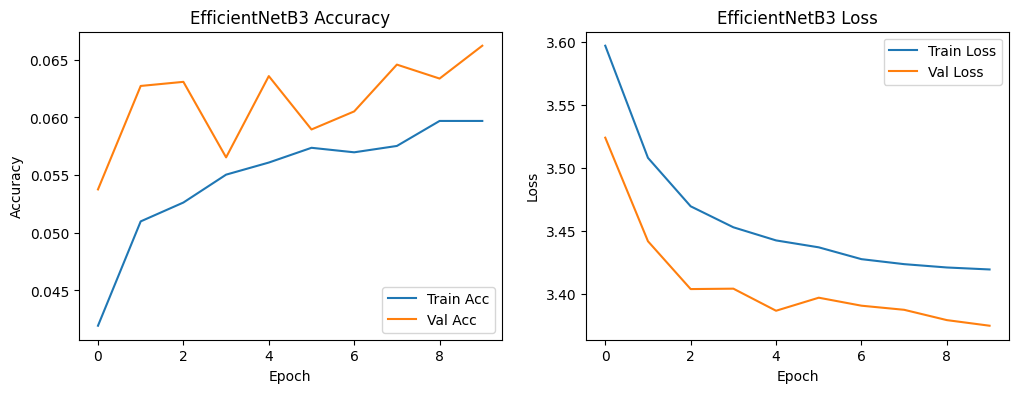

In [ ]:
# === Plots ===
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history_eff.history["accuracy"], label="Train Acc")
plt.plot(history_eff.history["val_accuracy"], label="Val Acc")
plt.title("EfficientNetB3 Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_eff.history["loss"], label="Train Loss")
plt.plot(history_eff.history["val_loss"], label="Val Loss")
plt.title("EfficientNetB3 Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()